In [2]:
import csv
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
from scipy import stats
import math
import seaborn as sns
from collections import OrderedDict
%matplotlib inline
import pg8000
import sys
import os
import pathlib2
import warnings
warnings.filterwarnings('ignore')

In [3]:
mdata = pd.read_csv("../data/mouse_smart_data.csv")
mdata

,recording_date,anno.rna_amp_pass_fail_label,anno.res_index_label,code,drivers,cell_name,patched_cell_container,63x_call
0,2018-01-02,Pass,1.000000,mIVSCC-MET,Chat-IRES-Cre-neo,Chat-IRES-Cre-neo;Ai14-365769.04.02.01,P8S4_180102_351_A01,63x go
1,2018-01-02,Pass,0.000000,mIVSCC-MET,Chat-IRES-Cre-neo,Chat-IRES-Cre-neo;Ai14-365769.04.02.02,P8S4_180102_352_A01,NaN
2,2018-01-02,Pass,0.745543,mIVSCC-MET,Chat-IRES-Cre-neo,Chat-IRES-Cre-neo;Ai14-365769.05.02.01,P8S4_180102_353_A01,NaN
3,2018-01-02,Pass,0.880454,mIVSCC-MET,Pdyn-T2A-CreERT2,Pdyn-T2A-CreERT2;Ai14-366659.04.01.01,P9S4_180102_401_A01,63x go
4,2018-01-02,Pass,1.000000,mIVSCC-MET,Chat-IRES-Cre-neo,Chat-IRES-Cre-neo;Ai14-365769.03.01.01,P9S4_180102_402_A01,63x no go
5,2018-01-02,Pass,1.000000,mIVSCC-MET,Pdyn-T2A-CreERT2,Pdyn-T2A-CreERT2;Ai14-366659.05.01.01,P9S4_180102_403_A01,63x go
6,2018-01-03,Pass,0.000000,mIVSCC-MET,Calb1-IRES2-Cre Sst-IRES-FlpO,Calb2-IRES-Cre;Sst-IRES-FlpO;Ai65-366183.04.02.01,P8S4_180103_351_A01,NaN
7,2018-01-03,Pass,1.000000,mIVSCC-MET,Calb1-IRES2-Cre Sst-IRES-FlpO,Calb2-IRES-Cre;Sst-IRES-FlpO;Ai65-366183.04.02.02,P8S4_180103_352_A01,63x no go
8,2018-01-03,Pass,0.880454,mIVSCC-MET,Pdyn-T2A-CreERT2,Pdyn-T2A-CreERT2;Ai14-366660.05.02.01,PAS4_180103_451_A01,63x no go
9,2018-01-03,Pass,0.784887,mIVSCC-MET,Pdyn-T2A-CreERT2,Pdyn-T2A-CreERT2;Ai14-366660.04.02.01,PAS4_180103_452_A01,63x go


In [4]:
d = {}

In [5]:
d['Gad2-IRES-Cre'] = 'Pan-inhibitory'
d['Rbp4-Cre_KL100'] = 'Layer 5 enriched'
d['Slc32a1-IRES-Cre'] = 'Pan-inhibitory'
d['Vip-IRES-Cre'] = 'Vip'
d['Sst-IRES-Cre'] = 'Sst'
d['Pvalb-IRES-Cre'] = 'PV'
d['Ndnf-IRES2-dgCre'] = 'Lamp5'
d['Chrna2-Cre_OE25'] = 'Sst'
d['Chat-IRES-Cre-neo'] = 'Vip'
d['Rorb-IRES2-Cre'] = 'Layer 4, 5 enriched'
d['Oxtr-T2A-Cre'] = 'Mixed expression'
d['Ntsr1-Cre_GN220'] = 'Layer 6 enriched'
d['Scnn1a-Tg2-Cre'] = 'Layer 4, 5 enriched'
d['Htr3a-Cre_NO152'] ='Vip'
d['Ctgf-T2A-dgCre'] = 'Layer 6 enriched'
d['Cux2-CreERT2'] = 'Layer 2/3, 4 enriched'
d['Scnn1a-Tg3-Cre'] = 'Layer 4, 5 enriched'
d['Pdyn-T2A-CreERT2'] = 'Sst'
d['Nr5a1-Cre'] = 'Layer 2/3, 4 enriched'
d['Nos1-CreERT2'] = 'Mixed expression'
d['Pvalb-T2A-FlpO Vipr2-IRES2-Cre'] = 'PV'
d['Ndnf-IRES2-dgCre; Slc32a1-IRES2-FlpO'] = 'Lamp5'
d['Nos1-CreERT2 Sst-IRES-FlpO'] = 'Sst'
d['Slc17a6-IRES-Cre'] = 'Pan-excitatory'
d['Slc32a1-T2A-FlpO Vipr2-IRES2-Cre'] = 'PV'
d['Crh-IRES-Cre_ZJH; Sst-IRES-FlpO'] = 'Sst'
d['Slc17a8-IRES2-Cre Slc32a1-IRES2-FlpO'] = 'Mixed expression'
d['Sim1-Cre_KJ18'] = 'Layer 5 enriched'
d['Th-Cre_FI172'] = 'PV'
d['Tlx3-Cre_PL56'] = 'Layer 5 enriched'
d['Rorb-IRES2-Cre-neo'] = 'Layer 4, 5 enriched'
d['Nkx2-1-CreERT2'] = 'PV' 
d['Vipr2-IRES2-Cre'] = 'Mixed expression'
d['Slc17a8-iCre'] = 'Mixed expression'
d['Th-P2A-FlpO'] = 'PV'
d['Oxtr-T2A-Cre; Pvalb-T2A-FlpO'] = 'PV'
d['Sst-IRES-FlpO; Tac1-IRES2-Cre'] = 'Sst'
d['Chrna2-Cre_OE25; Pvalb-T2A-FlpO'] = 'PV'
d['Glt25d2-Cre_NF107'] = 'Layer 5 enriched'
d['Etv1-CreERT2; Pvalb-T2A-FlpO'] = 'PV'
d['Slc17a8-IRES2-Cre'] = 'Mixed expression'
d['Penk-IRES2-Cre-neo'] = 'Mixed expression'
d['Npr3-IRES2-Cre; Sst-IRES-FlpO'] = 'Sst'
d['Calb1-IRES2-Cre; Sst-IRES-FlpO'] = 'Sst'
d['Chrna2-Cre_OE25; Vip-IRES-FlpO'] = 'Vip'
d['Sst-IRES-FlpO; Tac2-IRES2-Cre'] = 'Sst' 
d['Sst-Cre'] = 'Sst'
d['Npy-IRES2-FlpO'] = 'unknown'
d['Esr2-IRES2-Cre'] = 'unknown'
d['Pvalb-T2A-FlpO; Slc32a1-IRES-Cre'] = 'unknown'
d['Esr2-IRES2-Cre-neo; PhiC31-neo'] = 'unknown'
d['EE609-lacZ-CreERT2-Tg2'] = 'unknown'
d['Gng7-Cre_KH71'] = 'unknown'
d['Ntng2-IRES2-Cre'] = 'unknown'
d['Pvalb-T2A-FlpO; Tlx3-Cre_PL56'] = 'unknown'
d['Erbb4-T2A-CreERT2'] = 'unknown'
d['Htr3a-Cre_NO152; Pvalb-T2A-Dre'] = 'unknown'
d['Pvalb-T2A-FlpO; Sst-IRES-Cre'] = 'unknown'
d['Slc32a1-IRES2-FlpO'] = 'unknown'
d['Snap25-IRES2-Cre'] = 'unknown'
d['Ndnf-IRES2-dgCre; Slc17a6-IRES2-FlpO'] = 'unknown'
d['Pvalb-IRES-Cre; Rorb-T2A-tTA2'] = 'unknown' 
d['Cart-IRES2-Cre'] = 'unknown'
d['Slc17a7-IRES2-Cre'] = 'unknown'
d['Nos1-CreERT2; Sst-IRES-FlpO'] = 'Sst'
d['Calb2-IRES-Cre; Sst-IRES-FlpO'] = 'Sst'
d['Tac1-IRES2-Cre; Sst-IRES-FlpO'] = 'Sst'
d['Chrna2-Cre_OE25; Sst-IRES-FlpO'] = 'Sst'
d['Etv1-CreERT2; Sst-IRES-FlpO'] = 'Sst'
d['Etv1-CreERT2; Pvalb-IRES-FlpO'] = 'PV'
d['Tac2-IRES2-Cre; Sst-IRES-FlpO'] = 'Sst'
d['Chrnb3'] = 'Sst'
d['Chrnb3-Cre;Sst-IRES-FlpO'] = 'Sst'
d['Pvalb-T2A-Cre; Chrna2-Cre_OE25'] = 'PV'
d['Th-Cre_FI172; Sst-IRES-FlpO'] = 'Sst'
d['Vipr2-IRES2-Cre; Slc32a1-T2A-FlpO'] = 'PV'
d['Vipr2-IRES2-Cre; Pvalb-T2A-FlpO'] = 'PV'
d['Htr3a-Cre_NO152; Pvalb-T2A-FlpO'] = 'unknown'
d['Htr3a-Cre_NO152; Sst-IRES-FlpO'] = 'unknown'
d['Cck-IRES-Cre; Vip-IRES-FlpO'] = 'Vip'
d['Vip-IRES-Cre; Npy-IRES2-FlpO'] = 'Vip'
d['Slc17a8-IRES2-Cre; Slc32a1-IRES2-FlpO'] = 'Mixed expression'
d['Penk-IRES2-Cre-neo; Slc17a6-IRES2-FlpO'] = 'Layer 6 enriched'

In [6]:
mdata['family'] = mdata['drivers'].map(d)
mdata

,recording_date,anno.rna_amp_pass_fail_label,anno.res_index_label,code,drivers,cell_name,patched_cell_container,63x_call,family
0,2018-01-02,Pass,1.000000,mIVSCC-MET,Chat-IRES-Cre-neo,Chat-IRES-Cre-neo;Ai14-365769.04.02.01,P8S4_180102_351_A01,63x go,Vip
1,2018-01-02,Pass,0.000000,mIVSCC-MET,Chat-IRES-Cre-neo,Chat-IRES-Cre-neo;Ai14-365769.04.02.02,P8S4_180102_352_A01,NaN,Vip
2,2018-01-02,Pass,0.745543,mIVSCC-MET,Chat-IRES-Cre-neo,Chat-IRES-Cre-neo;Ai14-365769.05.02.01,P8S4_180102_353_A01,NaN,Vip
3,2018-01-02,Pass,0.880454,mIVSCC-MET,Pdyn-T2A-CreERT2,Pdyn-T2A-CreERT2;Ai14-366659.04.01.01,P9S4_180102_401_A01,63x go,Sst
4,2018-01-02,Pass,1.000000,mIVSCC-MET,Chat-IRES-Cre-neo,Chat-IRES-Cre-neo;Ai14-365769.03.01.01,P9S4_180102_402_A01,63x no go,Vip
5,2018-01-02,Pass,1.000000,mIVSCC-MET,Pdyn-T2A-CreERT2,Pdyn-T2A-CreERT2;Ai14-366659.05.01.01,P9S4_180102_403_A01,63x go,Sst
6,2018-01-03,Pass,0.000000,mIVSCC-MET,Calb1-IRES2-Cre Sst-IRES-FlpO,Calb2-IRES-Cre;Sst-IRES-FlpO;Ai65-366183.04.02.01,P8S4_180103_351_A01,NaN,NaN
7,2018-01-03,Pass,1.000000,mIVSCC-MET,Calb1-IRES2-Cre Sst-IRES-FlpO,Calb2-IRES-Cre;Sst-IRES-FlpO;Ai65-366183.04.02.02,P8S4_180103_352_A01,63x no go,NaN
8,2018-01-03,Pass,0.880454,mIVSCC-MET,Pdyn-T2A-CreERT2,Pdyn-T2A-CreERT2;Ai14-366660.05.02.01,PAS4_180103_451_A01,63x no go,Sst
9,2018-01-03,Pass,0.784887,mIVSCC-MET,Pdyn-T2A-CreERT2,Pdyn-T2A-CreERT2;Ai14-366660.04.02.01,PAS4_180103_452_A01,63x go,Sst


In [7]:
mdata = mdata[['drivers','family']]
mdata = mdata.groupby(['family']).count().reset_index()

mdata

,family,drivers
0,Lamp5,77
1,"Layer 2/3, 4 enriched",9
2,Layer 5 enriched,55
3,Mixed expression,134
4,PV,208
5,Pan-excitatory,16
6,Pan-inhibitory,177
7,Sst,612
8,Vip,365
9,unknown,17


## Pie chart

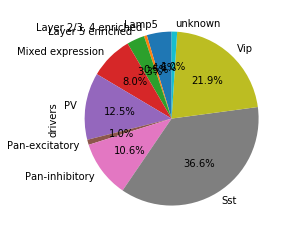

In [8]:
ax1 = plt.subplot(111, aspect='equal')
mdata.plot(kind='pie', y = 'drivers', ax=ax1, autopct='%1.1f%%', 
startangle=90, shadow=False, labels=mdata['family'], legend = False)
#plt.figure(figsize=(16,8))

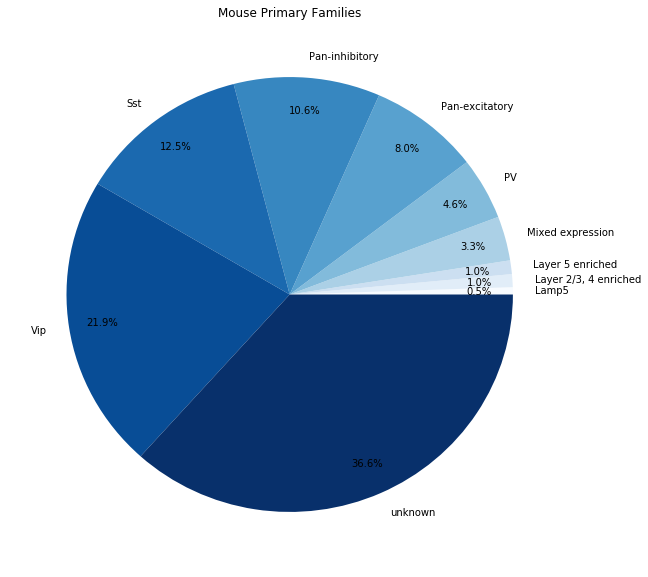

In [11]:
slices = mdata['drivers']
labels = mdata['family']

slices = sorted(slices)

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)

#cmap = plt.cm.prism
cmap = plt.cm.Blues
colors = cmap(np.linspace(0., 1., len(slices)))

ax.pie(slices, colors=colors, labels=labels, pctdistance=0.85, labeldistance=1.1, autopct='%1.1f%%')

plt.title('Mouse Primary Families')
#plt.tight_layout()
plt.savefig('../figures/mouse_pie', dpi=300, bbox_inches="tight")
plt.show()

In [10]:
for key, value in d.items():
    print("Driver:")
    print(key)
    print("Family:")
    print(value)
    print("")

Driver:
Slc17a7-IRES2-Cre
Family:
unknown

Driver:
Chrna2-Cre_OE25; Sst-IRES-FlpO
Family:
Sst

Driver:
Esr2-IRES2-Cre-neo; PhiC31-neo
Family:
unknown

Driver:
Penk-IRES2-Cre-neo; Slc17a6-IRES2-FlpO
Family:
Layer 6 enriched

Driver:
Slc32a1-T2A-FlpO Vipr2-IRES2-Cre
Family:
PV

Driver:
Oxtr-T2A-Cre
Family:
Mixed expression

Driver:
Slc32a1-IRES2-FlpO
Family:
unknown

Driver:
Ctgf-T2A-dgCre
Family:
Layer 6 enriched

Driver:
Etv1-CreERT2; Pvalb-IRES-FlpO
Family:
PV

Driver:
Sst-IRES-Cre
Family:
Sst

Driver:
Etv1-CreERT2; Pvalb-T2A-FlpO
Family:
PV

Driver:
Calb2-IRES-Cre; Sst-IRES-FlpO
Family:
Sst

Driver:
Pdyn-T2A-CreERT2
Family:
Sst

Driver:
Vip-IRES-Cre; Npy-IRES2-FlpO
Family:
Vip

Driver:
Cart-IRES2-Cre
Family:
unknown

Driver:
Sst-IRES-FlpO; Tac1-IRES2-Cre
Family:
Sst

Driver:
Cck-IRES-Cre; Vip-IRES-FlpO
Family:
Vip

Driver:
Th-Cre_FI172
Family:
PV

Driver:
Chrnb3-Cre;Sst-IRES-FlpO
Family:
Sst

Driver:
Chat-IRES-Cre-neo
Family:
Vip

Driver:
Snap25-IRES2-Cre
Family:
unknown

Driver:
Gng